0 i in lenght_REM
1 i in lenght_REM
1 i in lenght_REM
in REM_analisi2, da lenghtREM
0 i in analisi2
1 i in analisi2
0 j in analisi 2
in Lenght_REM, da analisi 2
0 i in lenght_REM
1 i in lenght_REM
2 i in lenght_REM
3 i in lenght_REM
4 i in lenght_REM
5 i in lenght_REM
6 i in lenght_REM
out of Lenght_REM, in analisi 2
5 j in analisi 2
out of REM_analisi2, in lenghtREM
7 i in lenght_REM
Hai dormito per 1 ore e 22 minuti
Hai avuto la 1 fase REM di durata 8 minuti a distanza di 18 minuti dall'inizio del sonno


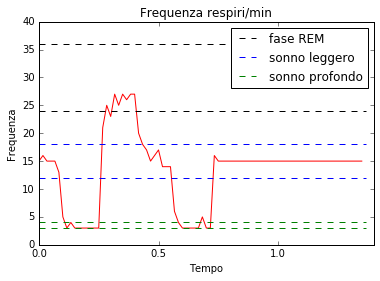

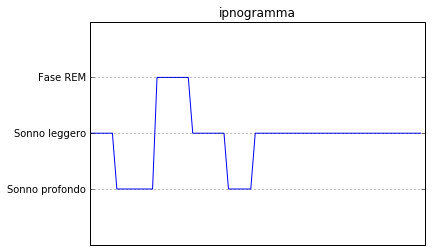

In [2]:
%matplotlib inline
import time
from datetime import time as dtime
import matplotlib.pyplot as plt
import numpy as np

def Analisi (A_respiri):
    
    fasisonno=list()
    i=0
    
    while i < len(A_respiri):
            
        if (A_respiri[i] >= sogliabassa_faseREM and A_respiri[i] <= sogliaalta_faseREM):
            j = Lenght_REM( A_respiri[i:] )  
            
            if (j != 0):
                fasisonno.append( [i, i + j, j + 1, "REM"])
                i = i + j
        
        
        elif (A_respiri[i] >= sogliabassa_sonnoleggero and A_respiri[i] <= sogliaalta_sonnoleggero):
            j = Lenght_SL( A_respiri[i:] )  
            
            if (j != 0):
                fasisonno.append( [i, i + j, j + 1, "SL"])
                i = i + j
                
                            
        elif (A_respiri[i] >= sogliabassa_sonnoprofondo and A_respiri[i] <= sogliaalta_sonnoprofondo):
            j = Lenght_SP( A_respiri[i:] )  
            
            if (j != 0):
                fasisonno.append( [i, i + j, j + 1, "SP"])
                i = i + j
        
        
        
        i= i + 1
        
    return fasisonno

def REM_analisi2 (A_respiri):
    i=0
    j=0
    
    while i < len(A_respiri):
        
        if (A_respiri[i] >= sogliabassa_faseREM and A_respiri[i] <= sogliaalta_faseREM):
            
            j = Lenght_REM( A_respiri[i:] )  
            
            if (j != 0):
                i = i + j
                return i
        
        i= i + 1
    
    


def Lenght_REM (Respiri_sliced):
    
    for i in range (len(Respiri_sliced)):
        
        if not Respiri_sliced[i] >= sogliabassa_faseREM:
            
            succ = [Respiri_sliced[i + x] for x in range (4) if (i+x < len(Respiri_sliced))]
            
            if i==0:
                return 0
            
            if max(succ) < sogliabassa_faseREM:
                return i - 1
    
            else: 
                
                i = REM_analisi2(Respiri_sliced[i:]) + i
                
                return i
            
    else:
        return i     

def Lenght_SL (Respiri_sliced):
    
    for i in range (len(Respiri_sliced)):
        
        if ( Respiri_sliced[i] > sogliaalta_sonnoleggero or Respiri_sliced[i] < sogliabassa_sonnoleggero): ###attenzione!
            
            if (i > 4):
                return i - 1
    
            else: 
                return 0
        
    else:
        return i    
    
    

def Lenght_SP (Respiri_sliced):
    
    for i in range (len(Respiri_sliced)):
        
        if ( Respiri_sliced[i] > sogliaalta_sonnoprofondo ): ###attenzione!
            
            if (i > 4):
                return i - 1
    
            else: 
                return 0
        
    else:
        return i    
    


def Array_grafico (fasi_sonno):
    hypnogram=list()
    
    for i in range (len(fasi_sonno)):
        
        if (fasi_sonno[i][3] == "REM"):
            
            for x in range (fasi_sonno[i][2]):
                hypnogram.append(3)
        
        elif (fasi_sonno[i][3] == "SL"):
            
            for x in range (fasi_sonno[i][2]):
                hypnogram.append(2)
            
        elif (fasi_sonno[i][3] == "SP"):
            
            for x in range (fasi_sonno[i][2]):
                hypnogram.append(1)
            
    return hypnogram


def Tempo_REM_print (fasi_sonno,durata_sonno):
    
    h = int (durata_sonno / 3600)
    m = int ( (durata_sonno % 3600) /60 ) 
    
    print ("Hai dormito per " + str(h) + " ore e " + str(m) + " minuti")
    
    fasi_REM = [fasi_sonno[x] for x in range (len(fasi_sonno)) if fasi_sonno[x][3] == "REM"]
    n_REM = len(fasi_REM)
    
    if n_REM>0:
    
        print ("Hai avuto la 1 fase REM di durata " + str (fasi_REM[0][2]) + " minuti a distanza di " 
                + str (fasi_REM[0][0] + 1) +  " minuti dall'inizio del sonno")
    
    else: print("Non hai avuto fasi REM")
    
    if n_REM>1:
    
        for i in range (1,n_REM):
        
            distanza_REM = fasi_REM[i][0] - fasi_REM[i-1][1]
            tempo_REM = fasi_REM[i][2]
            
            print ("Hai avuto la " + str(i + 1) + " fase REM di durata " + str(tempo_REM) + " minuti a " 
                   + str (distanza_REM) + " minuti di distanza dalla precedente" )
            

#sleep analysis
sogliabassa_sonnoleggero = 12
sogliaalta_sonnoleggero = 18
sogliabassa_sonnoprofondo = 3
sogliaalta_sonnoprofondo = 4
sogliabassa_faseREM = 24
sogliaalta_faseREM = 36

Respiri=[15,16,15,15,15,13,5,3,4,3,3,3,3,3,3,3,21,25,23,27,25,27,26,27,27,
         20,18,17,15,16,17,14,14,14,6,4,3,3,3,3,3,5,3,3,16,15,15,15,15,15,
         15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,
         15,15,15,15,15,15,15,15,15,15]
        
A_respiri=np.array(Respiri)
durata_sonno = len(Respiri)*60 #attenzione! riallacciarsi correttamente a codice principale


fasi_sonno= Analisi (A_respiri)

Tempo_REM_print(fasi_sonno,durata_sonno)

t=np.arange(len(A_respiri))/60
t1=[0,len(A_respiri)/60]
Rpm_x = [ x/60 for x in range (len(A_respiri)) if (x % 30 == 0) ]
                    
plt.figure(1)
plt.plot( t, A_respiri, 'r')
plt.title("Frequenza respiri/min")
plt.xlabel("Tempo")
plt.ylabel("Frequenza")
linea1, = plt.plot( t1, [sogliabassa_sonnoleggero,sogliabassa_sonnoleggero],'b--')
linea2, = plt.plot( t1, [sogliaalta_sonnoleggero,sogliaalta_sonnoleggero],'b--')
linea3, = plt.plot( t1, [sogliabassa_sonnoprofondo,sogliabassa_sonnoprofondo],'g--')
linea4, = plt.plot( t1, [sogliaalta_sonnoprofondo,sogliaalta_sonnoprofondo],'g--')
linea5, = plt.plot( t1, [sogliabassa_faseREM,sogliabassa_faseREM],'k--')
linea6, = plt.plot( t1, [sogliaalta_faseREM,sogliaalta_faseREM],'k--')
plt.legend([linea5, linea1, linea3], ['fase REM', 'sonno leggero', 'sonno profondo'])
plt.gca().axes.get_xaxis().set_ticks(Rpm_x)
plt.show ()


hypno = Array_grafico(fasi_sonno)
hypno_x = np.arange(len(hypno))
hypno_y=[0,1,2,3,4]
my_ticks=[" ", "Sonno profondo", "Sonno leggero", "Fase REM"]

plt.figure(2)
plt.plot (hypno_x, hypno)
plt.axis ([0,len(hypno),0,4])
plt.title ("ipnogramma")
plt.yticks(hypno_y, my_ticks)
plt.gca().axes.get_xaxis().set_visible(False)
plt.grid ()
plt.show ()